TASK 1.1

In [ ]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt


df = pd.read_csv('./data/train_data.csv')


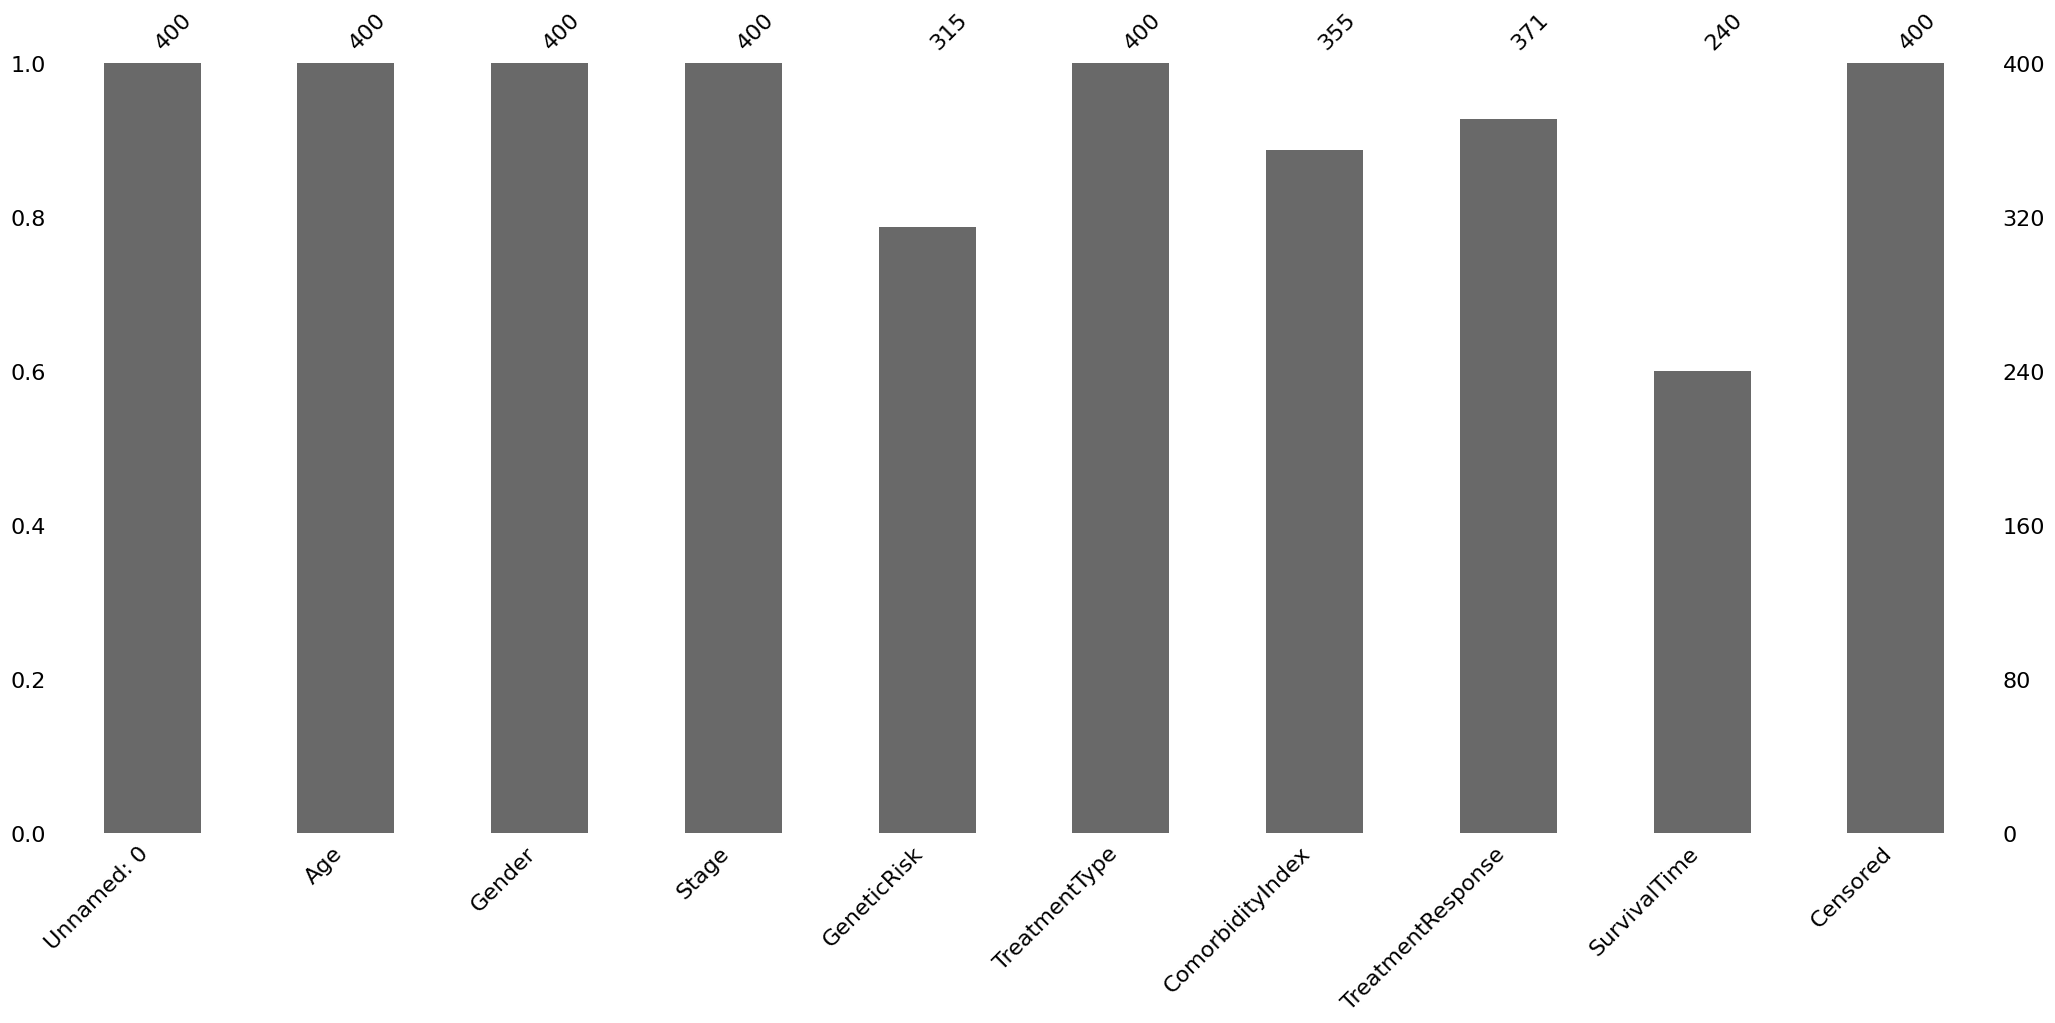

In [ ]:
#Simple visualization of missing values

msno.bar(df)
plt.show()


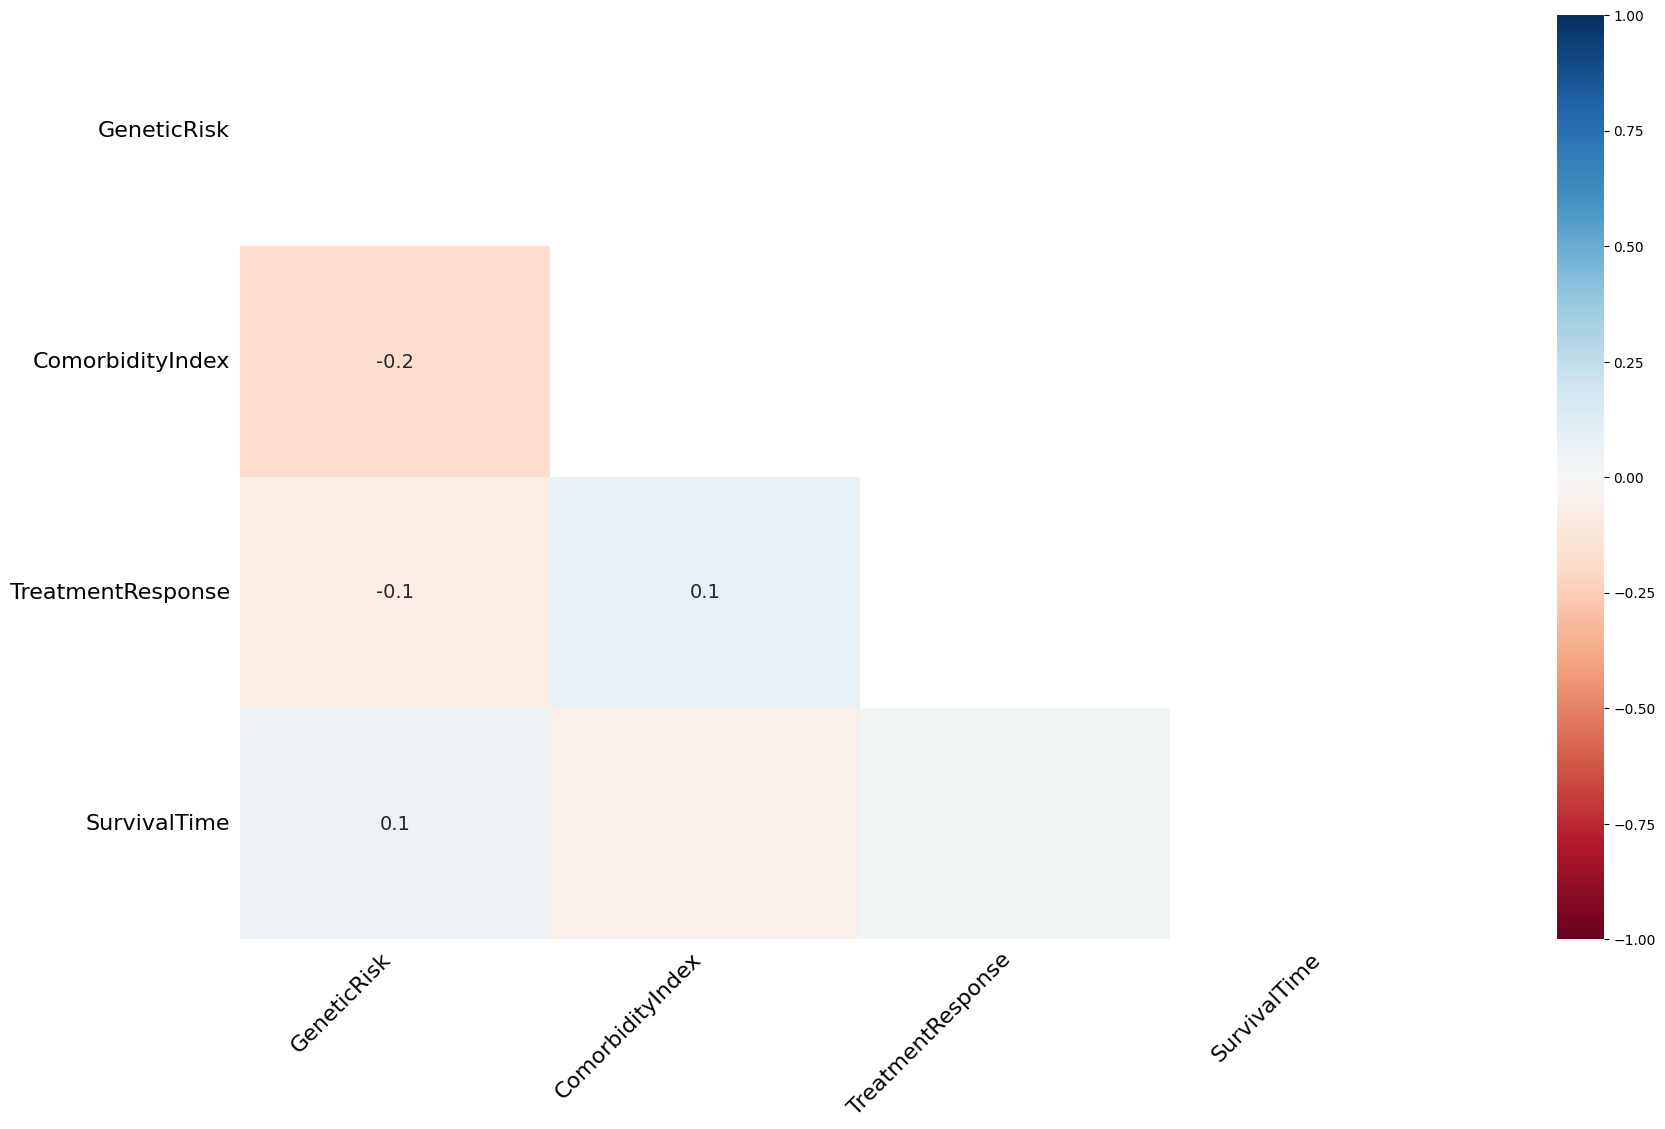

In [3]:
#Simple visualization of missing values

msno.heatmap(df)
plt.show()

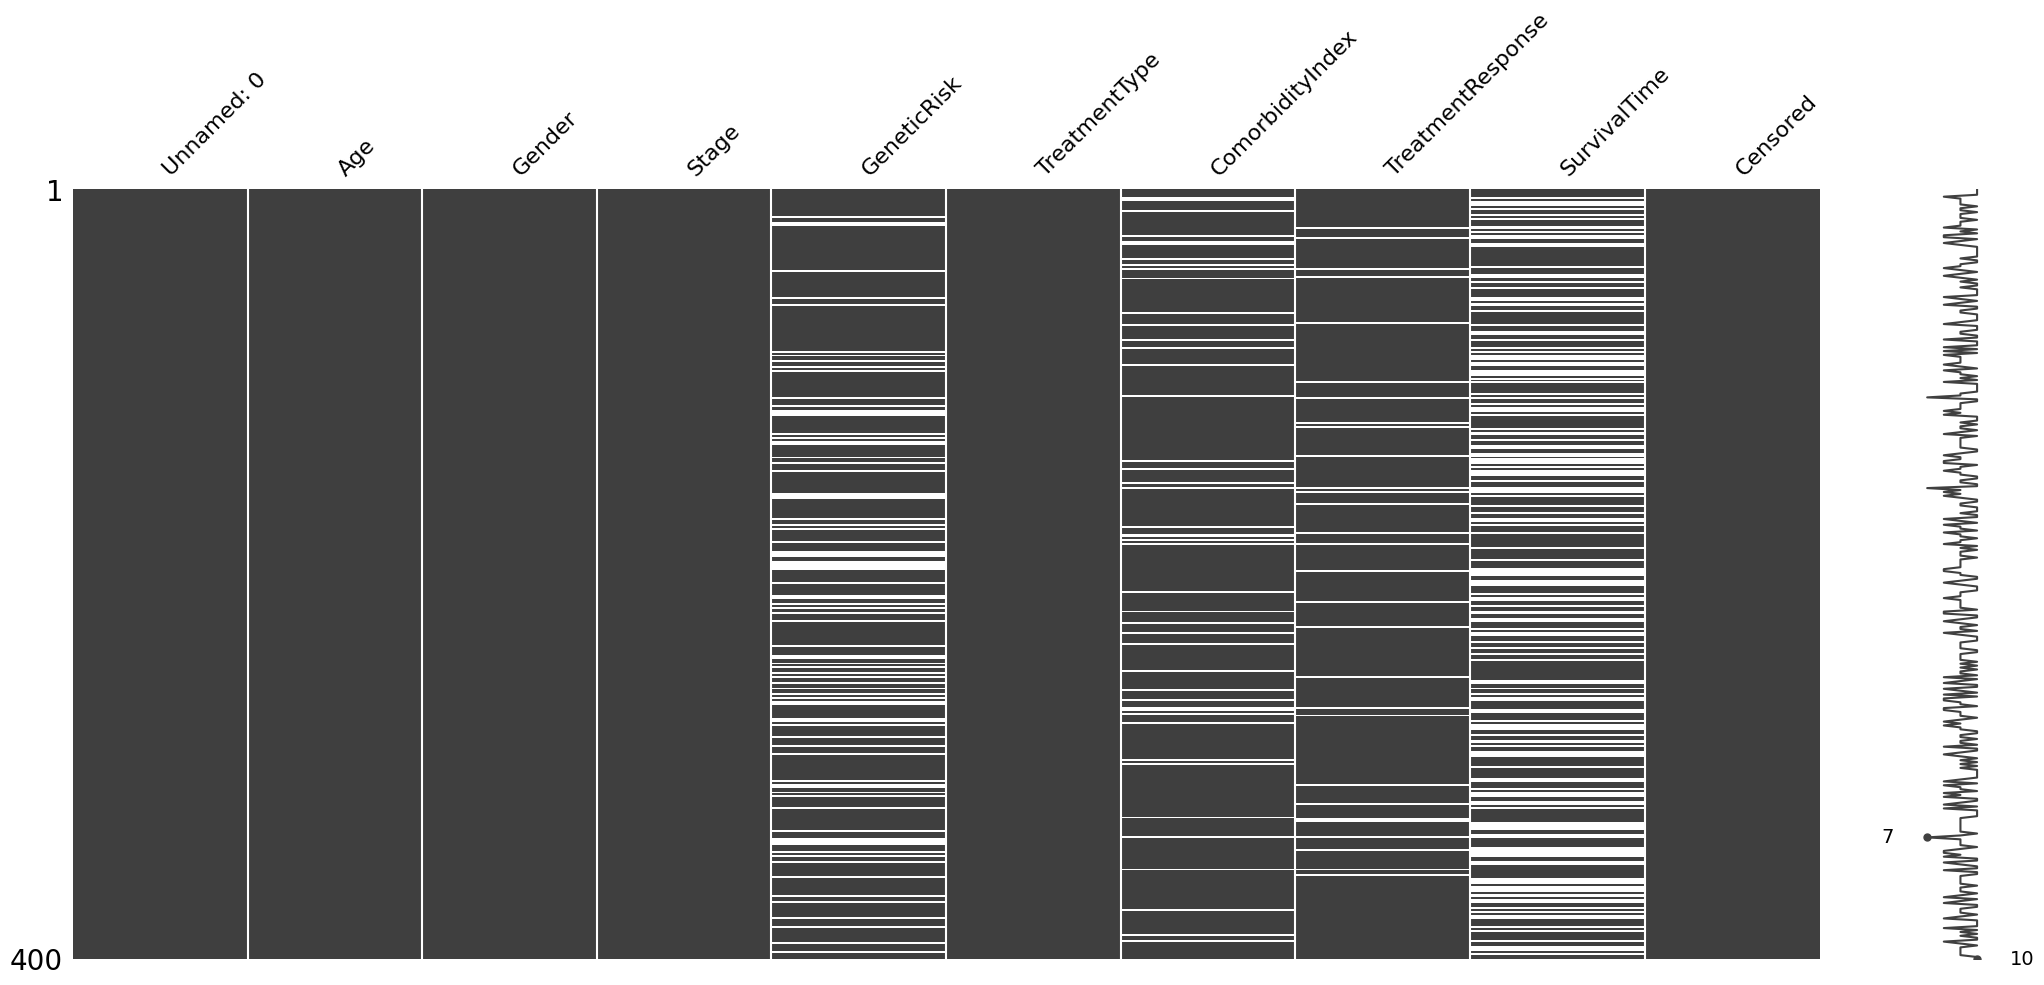

In [4]:
#Simple visualization of missing values

msno.matrix(df)
plt.show()

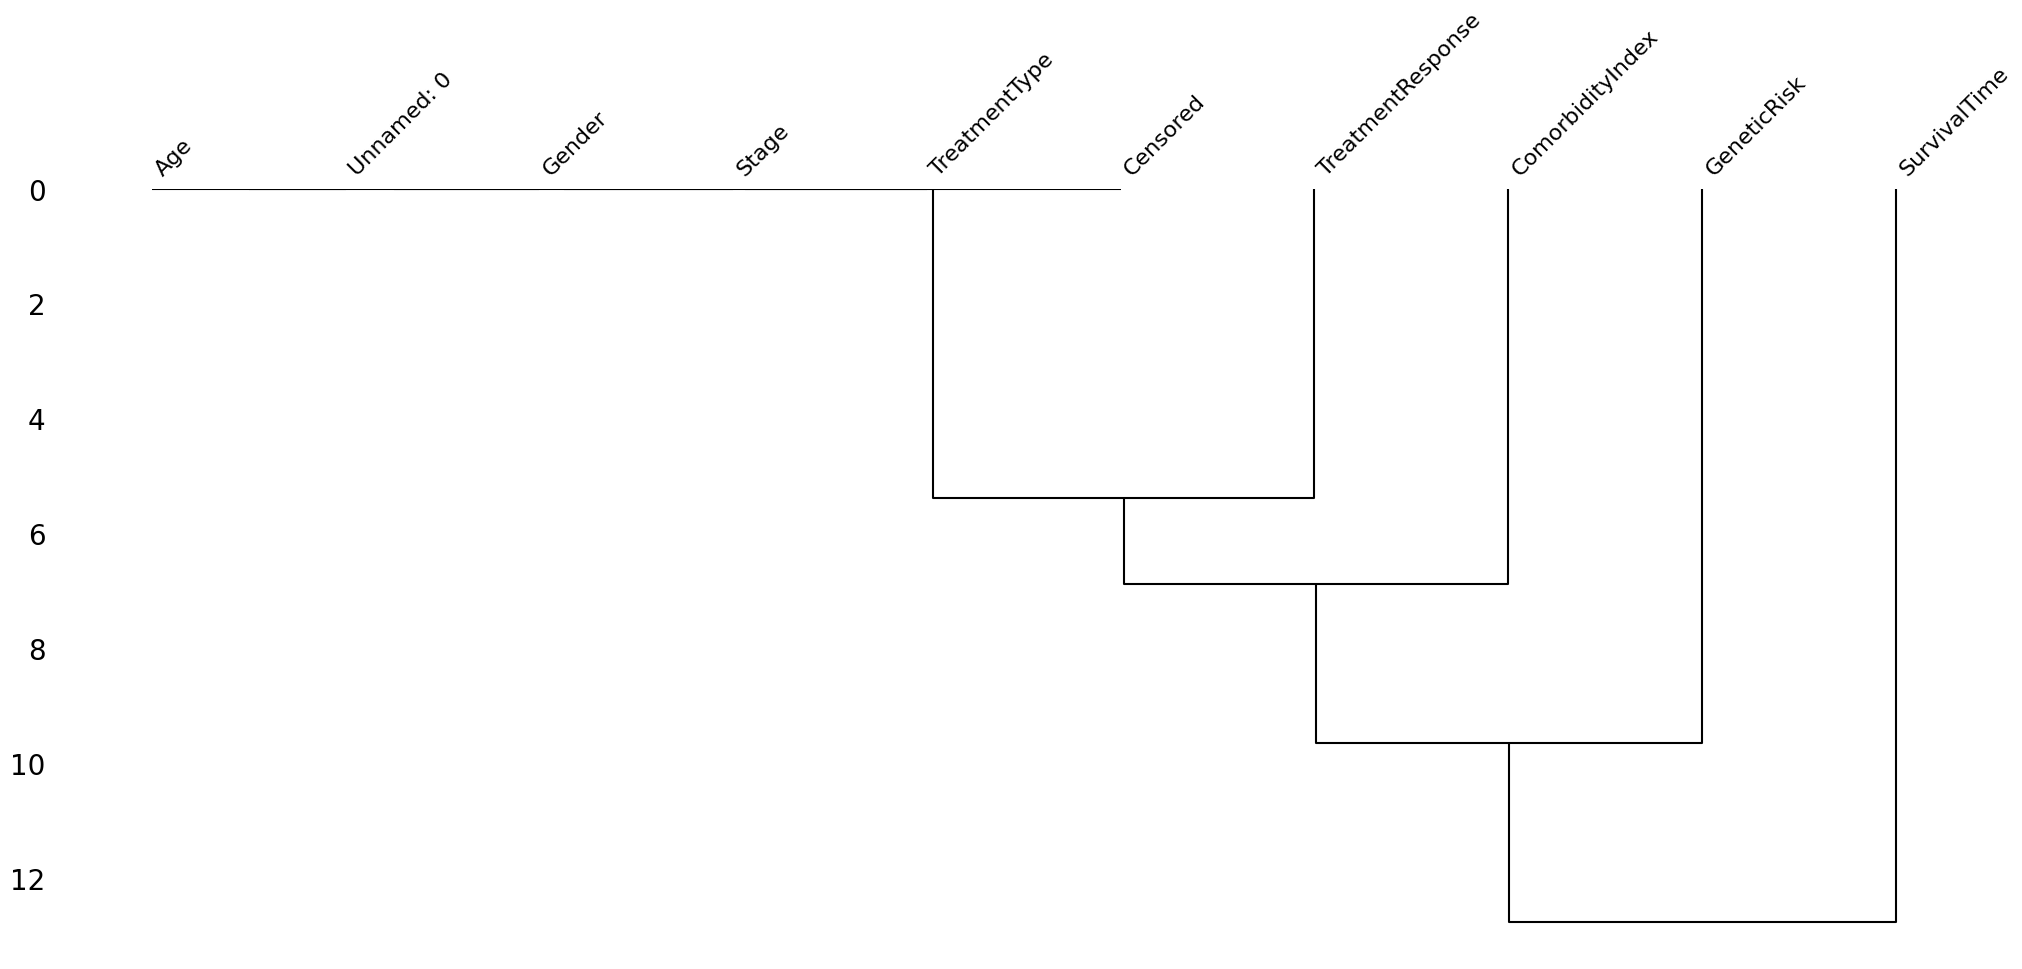

In [5]:
#Simple visualization of missing values

msno.dendrogram(df)
plt.show()

Remaining data points after dropping: 79


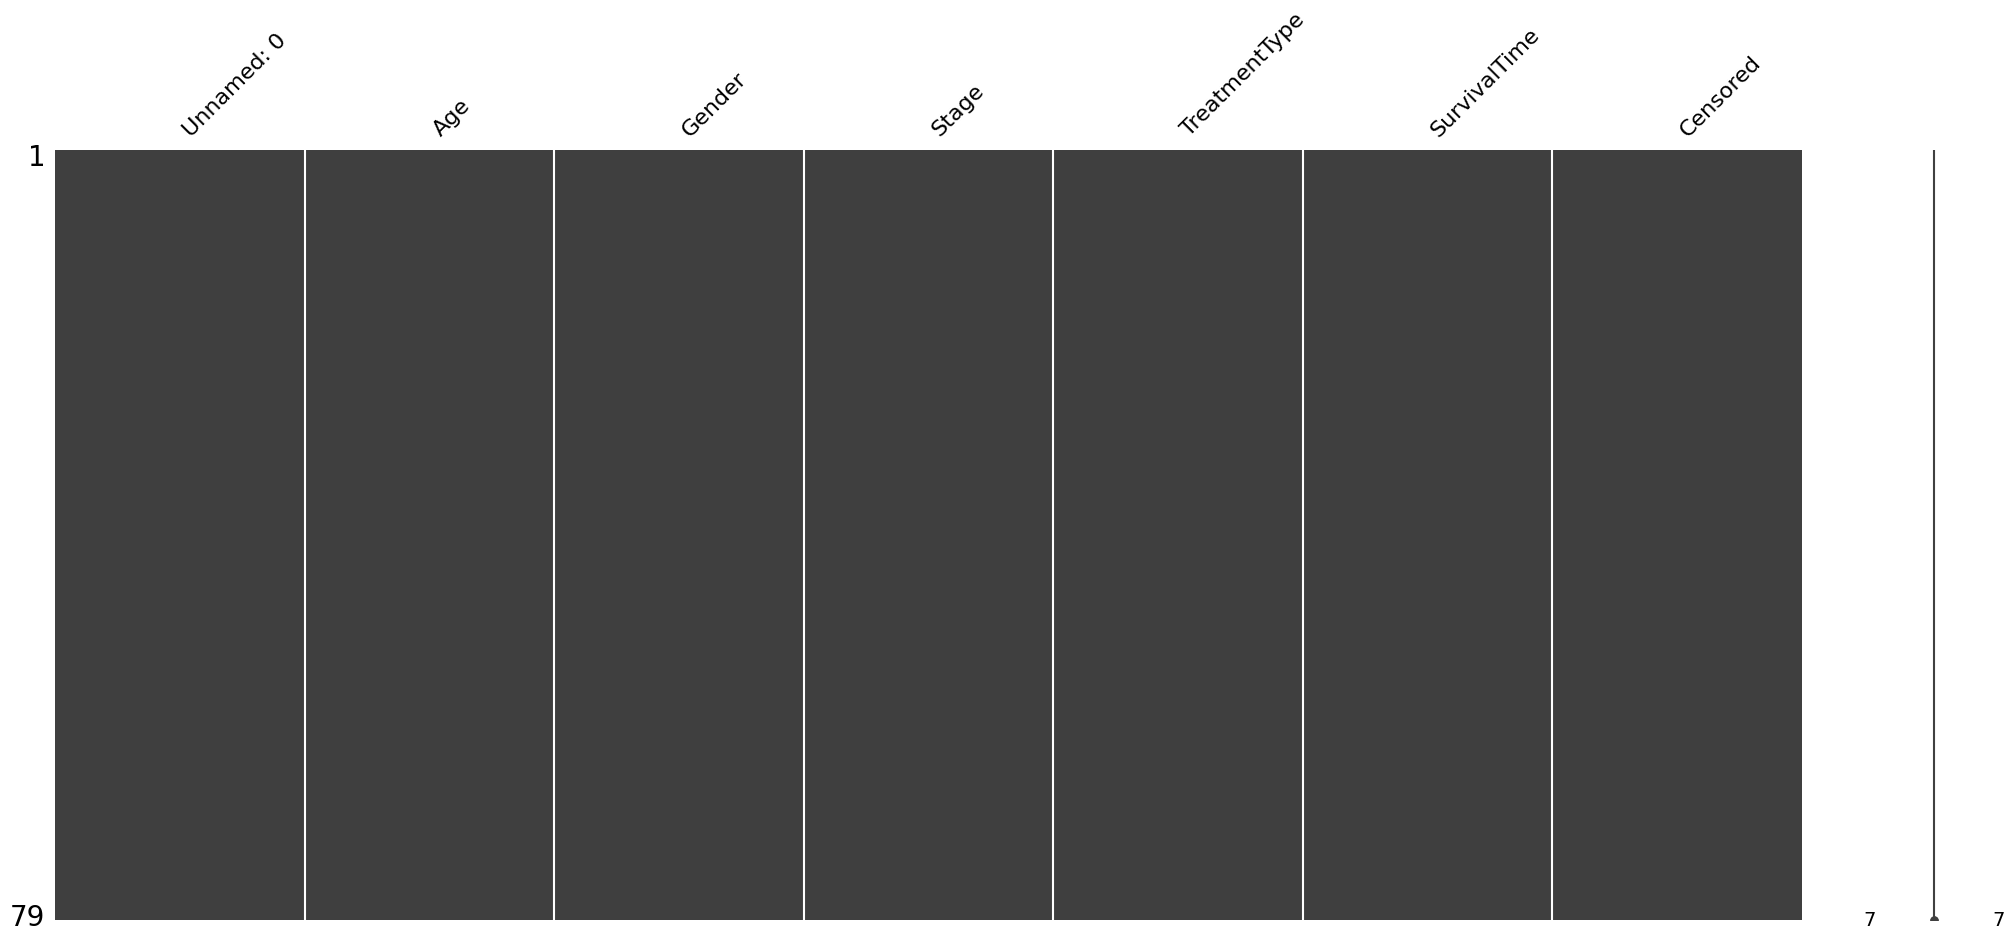

In [14]:
from matplotlib import pyplot as plt
import missingno as msno
import pandas as pd

df = pd.read_csv('train_data.csv')

# Drop rows with missing 'SurvivalTime' values
df_cleaned = df[df['SurvivalTime'].notnull()]

# Drop columns with missing data (for the baseline task 1.1)
df_cleaned = df_cleaned.dropna(axis=1)  # Drop columns with any missing data

# Drop rows where 'Censored' is 1 (Censoring occurs when the exact time of an event of interest (such as death or disease recurrence) is unknown)
df_cleaned = df_cleaned[(df_cleaned['Censored']==1)]

#answering how many data points remain after dropping?
print(f"Remaining data points after dropping: {df_cleaned.shape[0]}")

msno.matrix(df_cleaned)
plt.show()

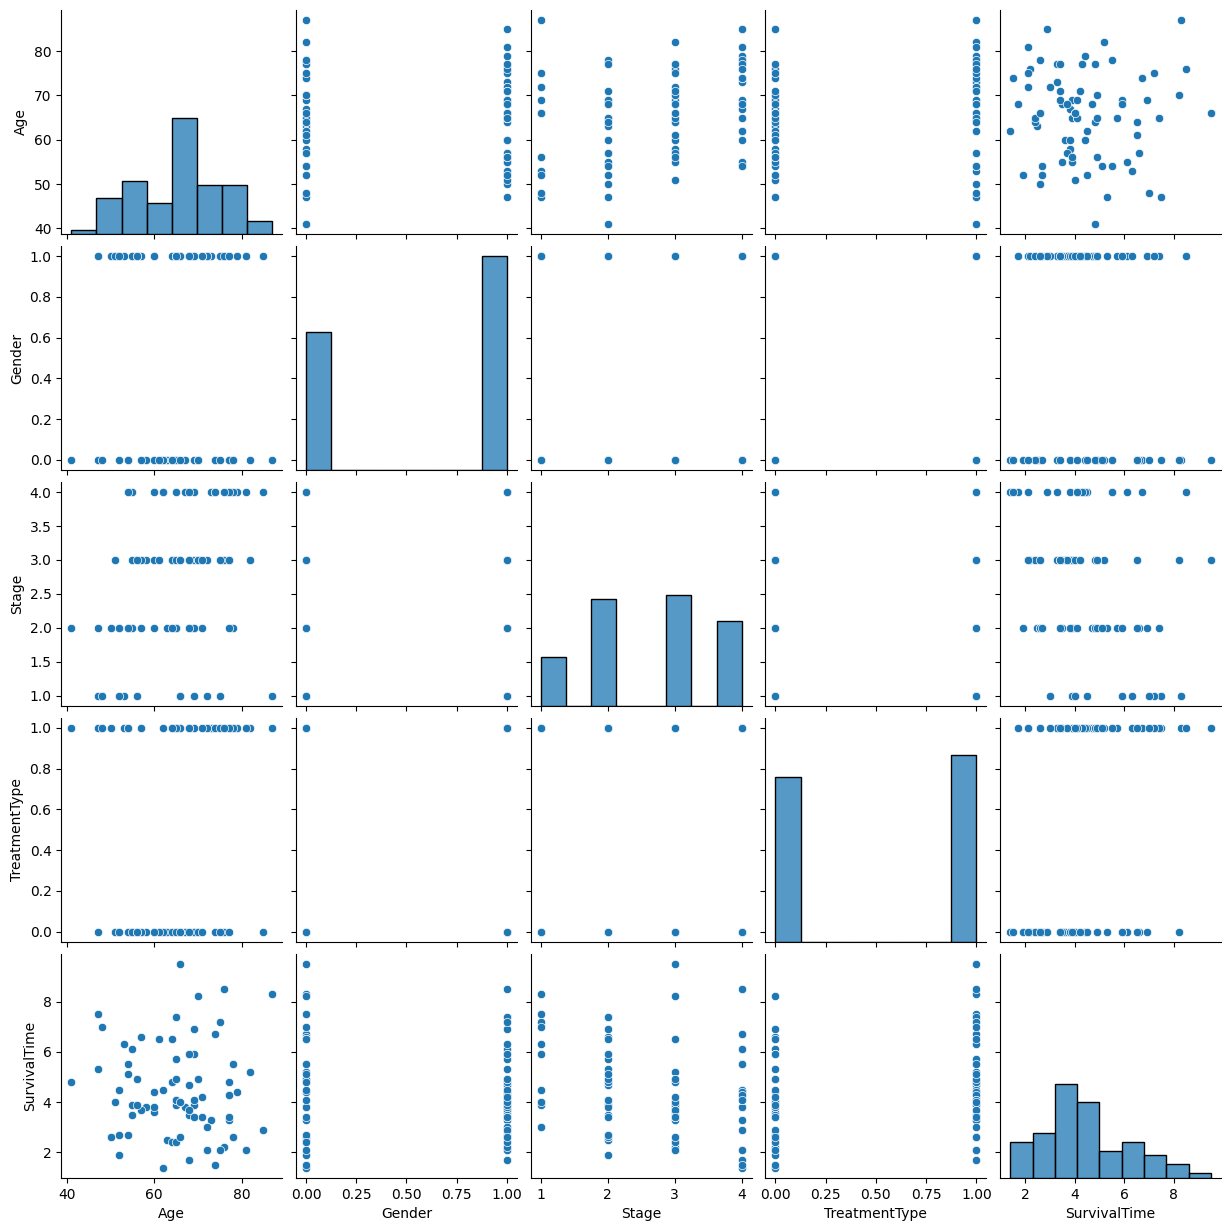

In [18]:
import seaborn as sns
#scattter plots and diagonal histograms

#we dont put here the Censored because its a label indicator(which is not a feature for prediction, but a flag for censoring)
sns.pairplot(df_cleaned, vars=['Age', 'Gender', 'Stage','TreatmentType', 'SurvivalTime'])
plt.show()

In [19]:
# Define the feature matrix (X) and target vector (y)
X = df_cleaned.drop(['SurvivalTime', 'Censored'], axis=1)  # Drop target and censoring indicator
y = df_cleaned['SurvivalTime']  # Target variable: survival time


In [ ]:

#Split test without
from sklearn.model_selection import train_test_split 


#80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# split training data into 80% training and 20% validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


ModuleNotFoundError: No module named 'sklearn'

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X_train, y_train)

# Step 4: Evaluate on the validation set
y_val_pred = model.predict(X_val)
val_mse = mean_squared_error(y_val, y_val_pred)
print(f'Validation Mean Squared Error: {val_mse}')

# Step 5: Test the model on the test set
y_test_pred = model.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)
print(f'Test Mean Squared Error: {test_mse}')

In [ ]:
from sklearn.model_selection import cross_val_score


import numpy as np
# we can improve cv
# Use cross-validation with a linear regression model
model = LinearRegression()
cv_scores = cross_val_score(model, X, y, cv=5)  # 5-fold cross-validation
print(f"Cross-validation scores: {cv_scores}")

average_cv_score = np.mean(cv_scores)
print(f"Average Cross-validation MSE: {average_cv_score}")

# Step 6: Train the model on the full dataset and test on a holdout test set (optional)
# If you still want to do a final test evaluation, split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit the model
model.fit(X_train, y_train)

# Evaluate on the test set
y_test_pred = model.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)
print(f"Test MSE: {test_mse}")


Comparing the Avarage MSE Cross validation value and the MSE value simple .... are more efficient then ..... because

In [ ]:
# Censored Mean Squared Error(we used this because for the censored cases we only know that the survival time is greater than some observed time)
# c = 0 for uncensored data points
# c = 1 for censored data points

def error_metric(y, y_hat, c):
    import numpy as np
    err = y-y_hat
    err = (1-c)*err**2 + c*np.maximum(0,err)**2
    return np.sum(err)/err.shape[0]

#c is the censored variable 
#  y is the true Survival Time, as determined by the ground truth.
#  The variable y_hat contains the predicted Survival Time.

Task 1.2